# Customer Churn Prediction for for a Telco


### About the data set:

The data set contains customer data for a popular Telecom service provider brand (Vodafone) in Germany.

In [10]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
!pip install xgboost
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix 

%matplotlib inline

In [11]:
#read the csv file and store into a DataFrame
given_data = pd.read_csv("Churn.csv")

In [12]:
# we view the dataframe to identify the categorical and numerical features
given_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# checking shape of training data
given_data.shape

(7043, 21)

In [14]:
# view the dataframe description & data types
given_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
# viewing the names of the given columns
given_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
#finding unique items in customerID column
print('The unique Customer IDs are: \n', given_data.customerID.unique(), '\n')

#finding the number of unique items in salary column
print('The number of unique Customer IDs are: ', len(given_data.customerID.unique()))

The unique Customer IDs are: 
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

The number of unique Customer IDs are:  7043


In [17]:
#finding unique items in gender column
print('The unique gender are: \n', given_data.gender.unique(), '\n')

#finding the number of unique items in salary column
print('The number of unique gender are: ', len(given_data.gender.unique()))

The unique gender are: 
 ['Female' 'Male'] 

The number of unique gender are:  2


In [18]:
#finding unique items in SeniorCitizen column
print('The unique SeniorCitizen are: \n', given_data.SeniorCitizen.unique(), '\n')

#finding the number of unique items in salary column
print('The number of unique SeniorCitizen are: ', len(given_data.SeniorCitizen.unique()))

The unique SeniorCitizen are: 
 [0 1] 

The number of unique SeniorCitizen are:  2


In [19]:
#finding unique items in Partner column
print('The unique Partner are: \n', given_data.Partner.unique(), '\n')

#finding the number of unique items in salary column
print('The number of unique Partner are: ', len(given_data.Partner.unique()))

The unique Partner are: 
 ['Yes' 'No'] 

The number of unique Partner are:  2


In [20]:
#finding unique items in Dependents column
print('The unique Dependents are: \n', given_data.Dependents.unique(), '\n')

#finding the number of unique items in salary column
print('The number of unique Dependents are: ', len(given_data.Dependents.unique()))

The unique Dependents are: 
 ['No' 'Yes'] 

The number of unique Dependents are:  2


In [21]:
#finding unique items in PhoneService column
print('The unique PhoneService are: \n', given_data.PhoneService.unique(), '\n')

#finding the number of unique items in PhoneService column
print('The number of unique PhoneService are: ', len(given_data.PhoneService.unique()))

The unique PhoneService are: 
 ['No' 'Yes'] 

The number of unique PhoneService are:  2


In [22]:
#finding unique items in MultipleLines column
print('The unique MultipleLines are: \n', given_data.MultipleLines.unique(), '\n')

#finding the number of unique items in MultipleLines column
print('The number of unique MultipleLines are: ', len(given_data.MultipleLines.unique()))

The unique MultipleLines are: 
 ['No phone service' 'No' 'Yes'] 

The number of unique MultipleLines are:  3


In [23]:
#finding unique items in InternetService column
print('The unique InternetService are: \n', given_data.InternetService.unique(), '\n')

#finding the number of unique items in InternetService column
print('The number of unique InternetService are: ', len(given_data.InternetService.unique()))

The unique InternetService are: 
 ['DSL' 'Fiber optic' 'No'] 

The number of unique InternetService are:  3


In [24]:
#finding unique items in OnlineSecurity column
print('The unique OnlineSecurity are: \n', given_data.OnlineSecurity.unique(), '\n')

#finding the number of unique items in OnlineSecurity column
print('The number of unique OnlineSecurity are: ', len(given_data.OnlineSecurity.unique()))

The unique OnlineSecurity are: 
 ['No' 'Yes' 'No internet service'] 

The number of unique OnlineSecurity are:  3


In [25]:
#finding unique items in OnlineBackup column
print('The unique OnlineBackup are: \n', given_data.OnlineBackup.unique(), '\n')

#finding the number of unique items in OnlineBackup column
print('The number of unique OnlineBackup are: ', len(given_data.OnlineBackup.unique()))

The unique OnlineBackup are: 
 ['Yes' 'No' 'No internet service'] 

The number of unique OnlineBackup are:  3


In [26]:
#finding unique items in DeviceProtection column
print('The unique DeviceProtection are: \n', given_data.DeviceProtection.unique(), '\n')

#finding the number of unique items in DeviceProtection column
print('The number of unique DeviceProtection are: ', len(given_data.DeviceProtection.unique()))

The unique DeviceProtection are: 
 ['No' 'Yes' 'No internet service'] 

The number of unique DeviceProtection are:  3


In [27]:
#finding unique items in TechSupport column
print('The unique TechSupport are: \n', given_data.TechSupport.unique(), '\n')

#finding the number of unique items in TechSupport column
print('The number of unique TechSupport are: ', len(given_data.TechSupport.unique()))

The unique TechSupport are: 
 ['No' 'Yes' 'No internet service'] 

The number of unique TechSupport are:  3


In [28]:
#finding unique items in StreamingTV column
print('The unique StreamingTV are: \n', given_data.StreamingTV.unique(), '\n')

#finding the number of unique items in StreamingTV column
print('The number of unique StreamingTV are: ', len(given_data.StreamingTV.unique()))

The unique StreamingTV are: 
 ['No' 'Yes' 'No internet service'] 

The number of unique StreamingTV are:  3


In [29]:
#finding unique items in StreamingMovies column
print('The unique StreamingMovies are: \n', given_data.StreamingMovies.unique(), '\n')

#finding the number of unique items in StreamingMovies column
print('The number of unique StreamingMovies are: ', len(given_data.StreamingMovies.unique()))

The unique StreamingMovies are: 
 ['No' 'Yes' 'No internet service'] 

The number of unique StreamingMovies are:  3


In [30]:
#finding unique items in Contract column
print('The unique Contract are: \n', given_data.Contract.unique(), '\n')

#finding the number of unique items in Contract column
print('The number of unique Contract are: ', len(given_data.Contract.unique()))

The unique Contract are: 
 ['Month-to-month' 'One year' 'Two year'] 

The number of unique Contract are:  3


In [31]:
#finding unique items in PaperlessBilling column
print('The unique PaperlessBilling are: \n', given_data.PaperlessBilling.unique(), '\n')

#finding the number of unique items in PaperlessBilling column
print('The number of unique PaperlessBilling are: ', len(given_data.PaperlessBilling.unique()))

The unique PaperlessBilling are: 
 ['Yes' 'No'] 

The number of unique PaperlessBilling are:  2


In [32]:
#finding unique items in PaymentMethod column
print('The unique PaymentMethod are: \n', given_data.PaymentMethod.unique(), '\n')

#finding the number of unique items in PaymentMethod column
print('The number of unique PaymentMethod are: ', len(given_data.PaymentMethod.unique()))

The unique PaymentMethod are: 
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

The number of unique PaymentMethod are:  4


In [33]:
#finding unique items in Churn column
print('The unique Churn are: \n', given_data.Churn.unique(), '\n')

#finding the number of unique items in Churn column
print('The number of unique Churn are: ', len(given_data.Churn.unique()))

The unique Churn are: 
 ['No' 'Yes'] 

The number of unique Churn are:  2


In [34]:
#finding unique items in MonthlyCharges column
print('The unique MonthlyCharges are: \n', given_data.MonthlyCharges.unique(), '\n')

#finding the number of unique items in MonthlyCharges column
print('The number of unique MonthlyCharges are: ', len(given_data.MonthlyCharges.unique()))

The unique MonthlyCharges are: 
 [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 

The number of unique MonthlyCharges are:  1585


In [35]:
#finding unique items in TotalCharges column
print('The unique TotalCharges are: \n', given_data.TotalCharges.unique(), '\n')

#finding the number of unique items in TotalCharges column
print('The number of unique TotalCharges are: ', len(given_data.TotalCharges.unique()))

The unique TotalCharges are: 
 ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5'] 

The number of unique TotalCharges are:  6531


# **Data Preparation**

In [36]:
given_data.TotalCharges = pd.to_numeric(given_data.TotalCharges, errors='coerce')

In [37]:
non_cat_data = pd.DataFrame(given_data, columns=['customerID','SeniorCitizen','tenure','MonthlyCharges','TotalCharges'])

In [38]:
non_cat_data.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,29.85,29.85
1,5575-GNVDE,0,34,56.95,1889.50
2,3668-QPYBK,0,2,53.85,108.15
3,7795-CFOCW,0,45,42.30,1840.75
4,9237-HQITU,0,2,70.70,151.65


In [39]:
non_cat_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [40]:
given_data.drop(labels = ['customerID','SeniorCitizen','tenure','MonthlyCharges','TotalCharges'], inplace=True, axis=1)

In [41]:
given_data.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [42]:
cat_data = given_data

In [43]:
cat_data = pd.get_dummies(cat_data, drop_first = True)

In [44]:
cat_data.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [45]:
total_data = pd.concat([cat_data, non_cat_data], axis=1)

In [46]:
total_data.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,7590-VHVEG,0,1,29.85,29.85
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,5575-GNVDE,0,34,56.95,1889.50
2,1,0,0,1,0,0,0,0,0,1,...,1,0,0,1,1,3668-QPYBK,0,2,53.85,108.15
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,7795-CFOCW,0,45,42.30,1840.75
4,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,1,9237-HQITU,0,2,70.70,151.65


In [47]:
loyal_data = total_data.copy()
churn_data = total_data.copy()

In [48]:
loyal_data.drop(loyal_data[loyal_data['Churn_Yes'] == 1].index, inplace = True)

In [49]:
loyal_data.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,7590-VHVEG,0,1,29.85,29.85
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,5575-GNVDE,0,34,56.95,1889.50
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,7795-CFOCW,0,45,42.30,1840.75
6,1,0,1,1,0,1,1,0,0,0,...,1,1,0,0,0,1452-KIOVK,0,22,89.10,1949.40
7,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,6713-OKOMC,0,10,29.75,301.90


In [50]:
loyal_data.shape

(5174, 32)

5174 loyal customers

In [51]:
churn_data.drop(churn_data[churn_data['Churn_Yes'] == 0].index, inplace = True)

In [52]:
churn_data.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
2,1,0,0,1,0,0,0,0,0,1,...,1,0,0,1,1,3668-QPYBK,0,2,53.85,108.15
4,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,1,9237-HQITU,0,2,70.70,151.65
5,0,0,0,1,0,1,1,0,0,0,...,1,0,1,0,1,9305-CDSKC,0,8,99.65,820.50
8,0,1,0,1,0,1,1,0,0,0,...,1,0,1,0,1,7892-POOKP,0,28,104.80,3046.05
13,1,0,0,1,0,1,1,0,0,0,...,1,0,0,0,1,0280-XJGEX,0,49,103.70,5036.30


In [53]:
churn_data.shape

(1869, 32)

1869 customers who churned

# **Data Exploration**

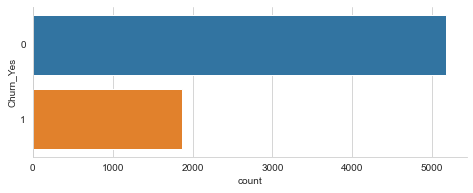

In [59]:
# A.) Churn numbers

ax = sns.catplot(y="Churn_Yes", kind="count", data=total_data, height=2.6, aspect=2.5, orient='h')

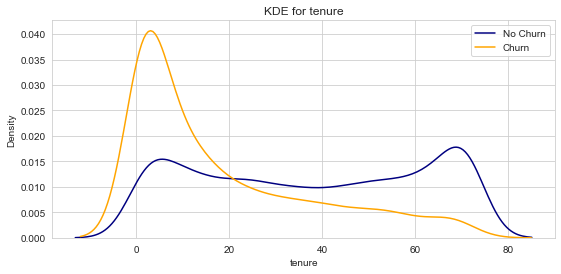

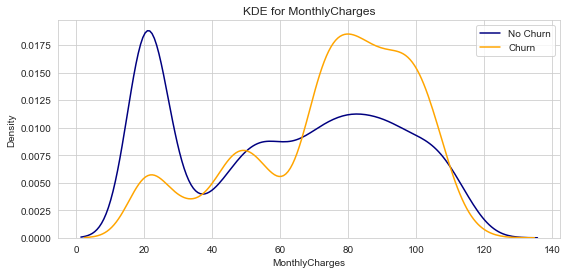

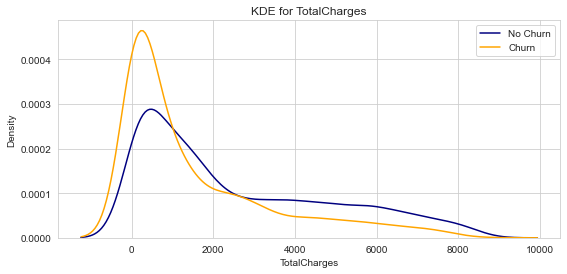

In [64]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(total_data[total_data['Churn_Yes'] == 0][feature].dropna(), color= 'navy', label= 'No Churn')
    ax1 = sns.kdeplot(total_data[total_data['Churn_Yes'] == 1][feature].dropna(), color= 'orange', label= 'Churn')
    plt.legend()
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

Recent clients are more likely to churn, Clients with higher MonthlyCharges are also more likely to churn
Tenure and MonthlyCharges are probably important features

<ipython-input-69-0daaf39d2701>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


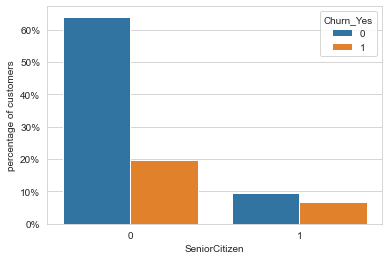

In [69]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = total_data.groupby(feature)["Churn_Yes"].value_counts().to_frame()
    g = g.rename({"Churn_Yes": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(total_data)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn_Yes', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn_Yes', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")

Senior Citizens are only ~16% of customers, but they have a much higher churn rate: 42% against 23% for non-senior customers.

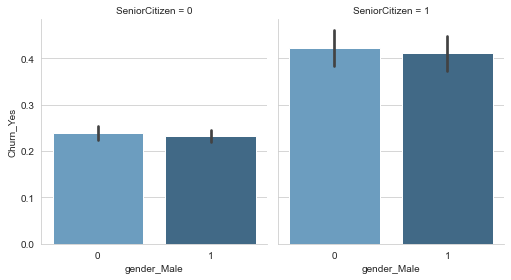

In [72]:
g = sns.FacetGrid(total_data, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender_Male", "Churn_Yes", palette = "Blues_d", order= [0,1])

Gender is not indicative of the churn rare

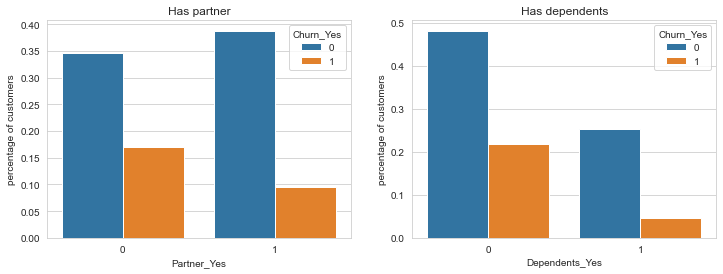

In [73]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = total_data.groupby('Partner_Yes')["Churn_Yes"].value_counts()/len(total_data)
gp_partner = gp_partner.to_frame().rename({"Churn_Yes": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner_Yes', y= axis_y, hue='Churn_Yes', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = total_data.groupby('Dependents_Yes')["Churn_Yes"].value_counts()/len(total_data)
gp_dep = gp_dep.to_frame().rename({"Churn_Yes": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents_Yes', y= axis_y, hue='Churn_Yes', data=gp_dep, ax=axis[1])

Customers that doesn't have partners are more likely to churn and customers without dependents are also more likely to churn

<ipython-input-69-0daaf39d2701>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


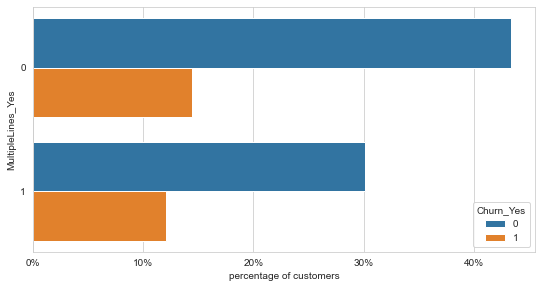

In [75]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("MultipleLines_Yes", orient='h')

Customers with multiple lines have a slightly higher churn rate

<ipython-input-69-0daaf39d2701>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


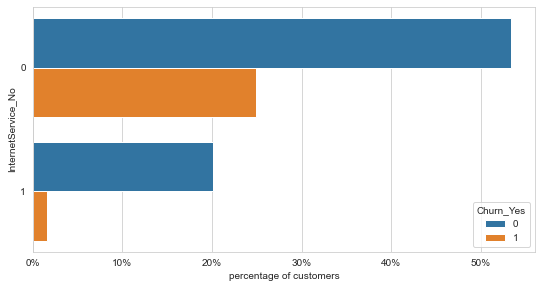

In [79]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService_No", orient="h")

Clients without internet have a very low churn rate

<ipython-input-69-0daaf39d2701>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


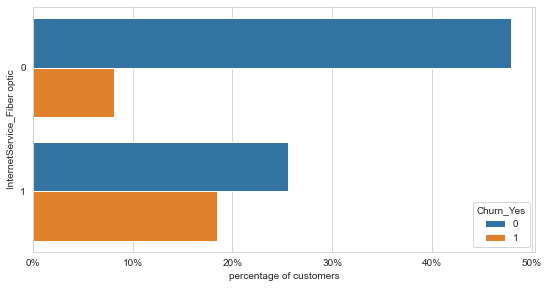

In [80]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService_Fiber optic", orient="h")

Customers with fiber are more probable to churn than those without the fiber

<AxesSubplot:>

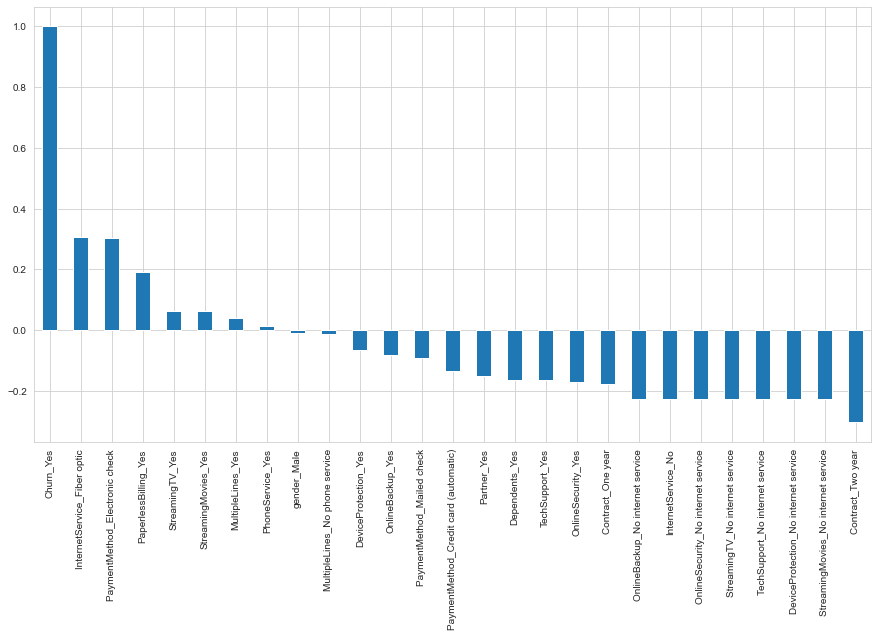

In [81]:
#Get Correlation of "Churn_Yes" with other variables:
plt.figure(figsize=(15,8))
cat_data.corr()['Churn_Yes'].sort_values(ascending = False).plot(kind='bar')

Fiber optic, Electronic check and Paperless Billing, StreamingTV, StremingMovies seem to be positively correlated with churn. While, without internet connection services, two year contracts seem to be negatively correlated with churn.


#  Model estimation

In [86]:
train = total_data.copy()

In [87]:
train.drop(labels = 'customerID', inplace=True, axis=1)

In [88]:
train.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,29.85,29.85
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,34,56.95,1889.50
2,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,1,0,2,53.85,108.15
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,0,1,0,0,0,...,0,1,0,1,0,1,0,2,70.70,151.65


### Visualizing relations

In [89]:
train.corr()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
gender_Male,1.000000,-0.001808,0.010517,-0.006488,0.006488,-0.008414,-0.011286,0.006026,0.006026,-0.017021,...,-0.003695,-0.011754,0.001215,0.000752,0.013744,-0.008612,-0.001874,0.005106,-0.014569,0.000048
Partner_Yes,-0.001808,1.000000,0.452676,0.017706,-0.017706,0.142057,0.000304,0.000615,0.000615,0.143106,...,0.248091,-0.014877,0.082029,-0.083852,-0.095125,-0.150448,0.016479,0.379697,0.096848,0.319072
Dependents_Yes,0.010517,0.452676,1.000000,-0.001762,0.001762,-0.024526,-0.165818,0.139812,0.139812,0.080972,...,0.204613,-0.111377,0.060267,-0.150642,0.059071,-0.164221,-0.211185,0.159712,-0.113890,0.064653
PhoneService_Yes,-0.006488,0.017706,-0.001762,1.000000,-1.000000,0.279690,0.289999,0.172209,0.172209,-0.092893,...,0.003519,0.016505,-0.007721,0.003062,-0.003319,0.011942,0.008576,0.008448,0.247398,0.113008
MultipleLines_No phone service,0.006488,-0.017706,0.001762,-1.000000,1.000000,-0.279690,-0.289999,-0.172209,-0.172209,0.092893,...,-0.003519,-0.016505,0.007721,-0.003062,0.003319,-0.011942,-0.008576,-0.008448,-0.247398,-0.113008
MultipleLines_Yes,-0.008414,0.142057,-0.024526,0.279690,-0.279690,1.000000,0.366083,-0.210564,-0.210564,0.098108,...,0.106253,0.163530,0.060048,0.083618,-0.227206,0.040102,0.142948,0.331941,0.490434,0.469042
InternetService_Fiber optic,-0.011286,0.000304,-0.165818,0.289999,-0.289999,0.366083,1.000000,-0.465793,-0.465793,-0.030696,...,-0.211526,0.326853,-0.050077,0.336410,-0.306834,0.308020,0.255338,0.019720,0.787066,0.360769
InternetService_No,0.006026,0.000615,0.139812,0.172209,-0.172209,-0.210564,-0.465793,1.000000,1.000000,-0.333403,...,0.218278,-0.321013,0.001030,-0.284917,0.321361,-0.227890,-0.182742,-0.039062,-0.763557,-0.374878
OnlineSecurity_No internet service,0.006026,0.000615,0.139812,0.172209,-0.172209,-0.210564,-0.465793,1.000000,1.000000,-0.333403,...,0.218278,-0.321013,0.001030,-0.284917,0.321361,-0.227890,-0.182742,-0.039062,-0.763557,-0.374878
OnlineSecurity_Yes,-0.017021,0.143106,0.080972,-0.092893,0.092893,0.098108,-0.030696,-0.333403,-0.333403,1.000000,...,0.191773,-0.003636,0.115721,-0.112338,-0.080798,-0.171226,-0.038653,0.327203,0.296594,0.412619


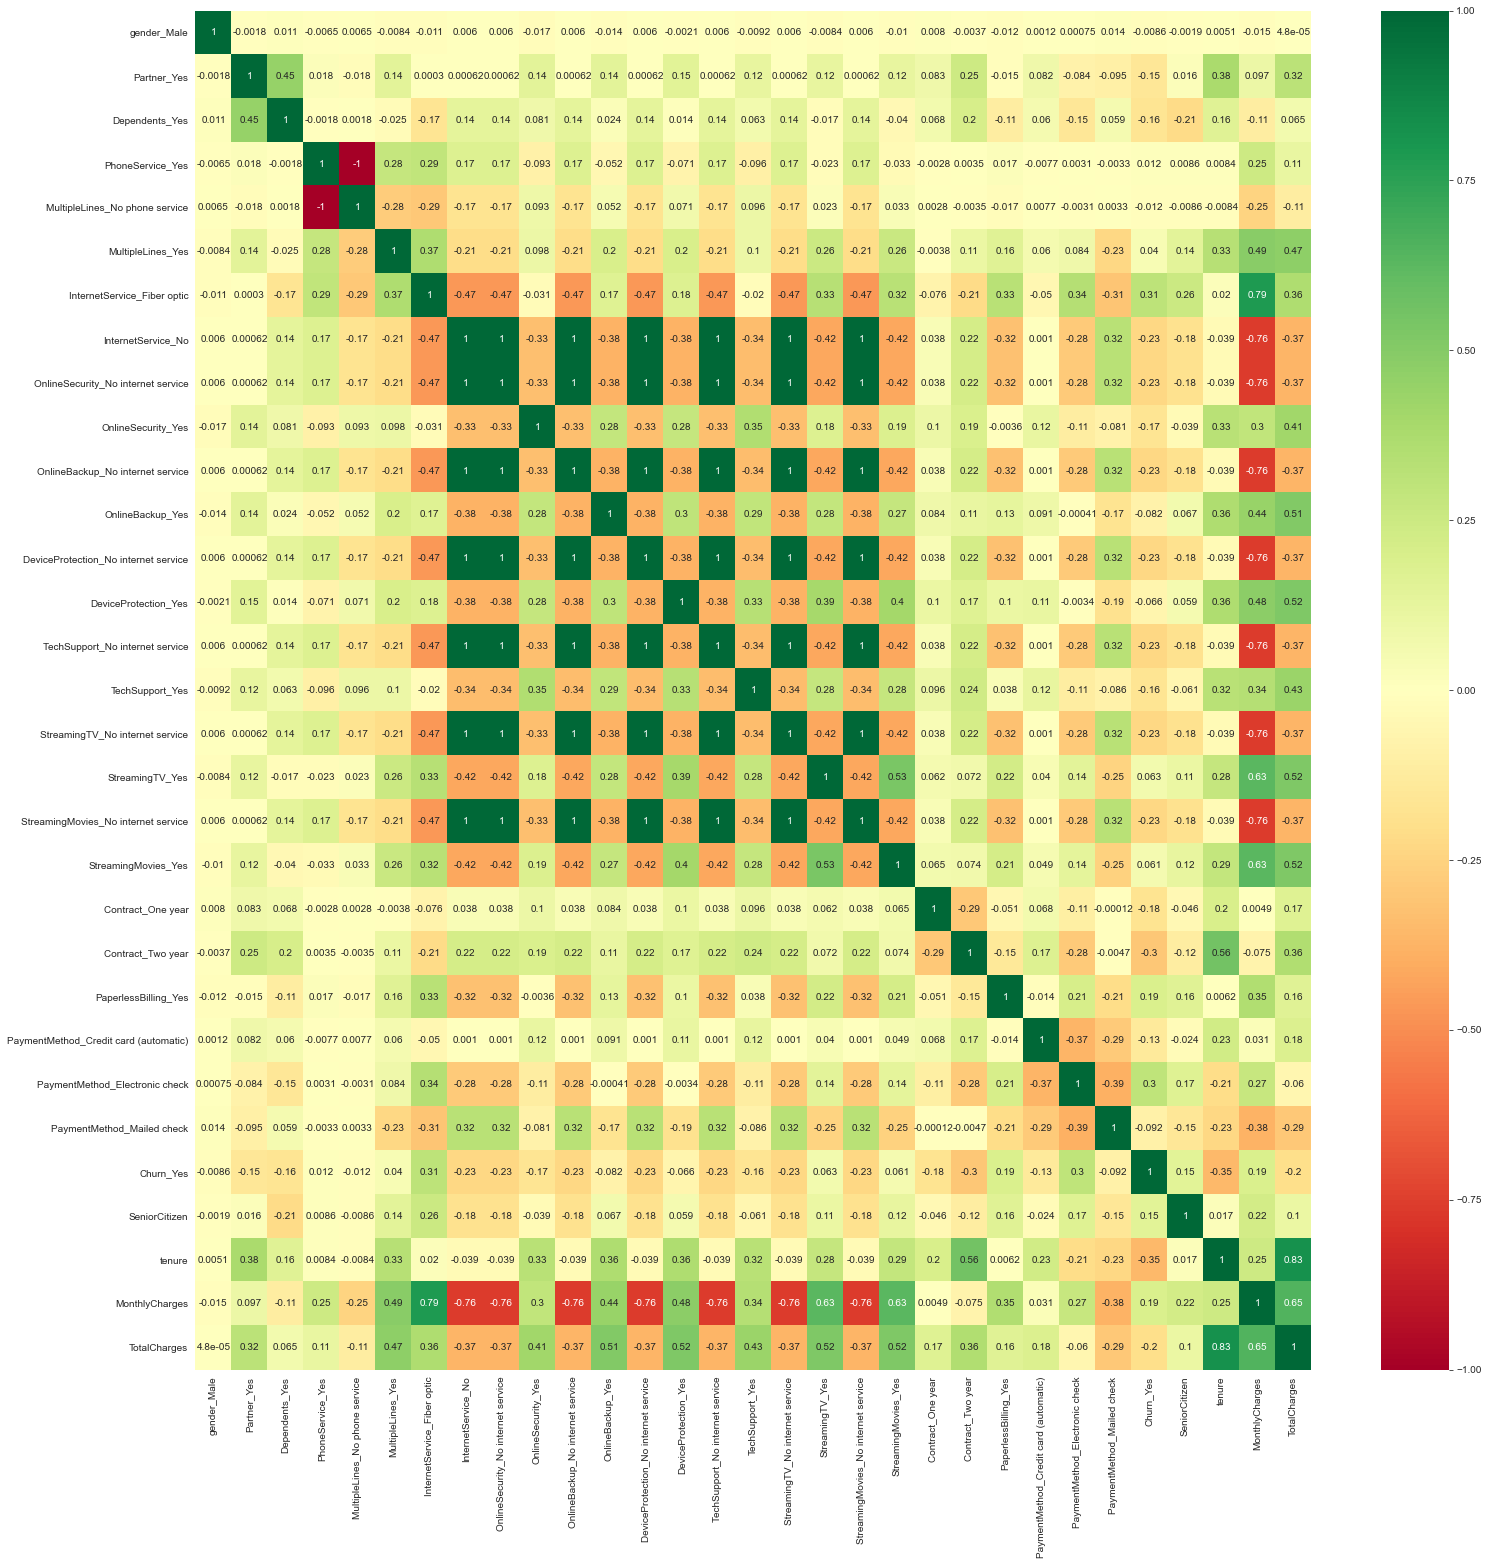

In [90]:
# Heat map for the feature correlations
%matplotlib inline
corr_matrix = train.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(25,25))
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [91]:
corr_variables = pd.concat([train['InternetService_No'], train['OnlineSecurity_No internet service'],train['OnlineBackup_No internet service'], train['TechSupport_No internet service'],train['StreamingTV_No internet service'], train['StreamingMovies_No internet service'], train['DeviceProtection_No internet service']], axis=1)

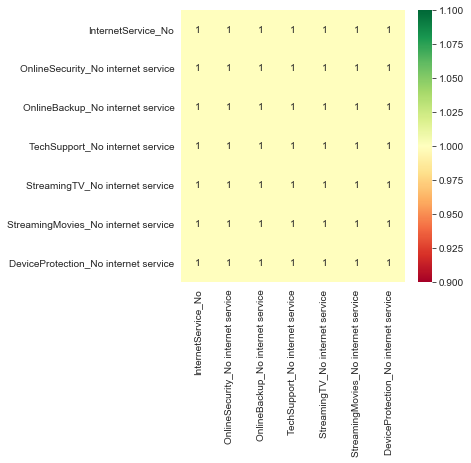

In [92]:
# Heat map for the feature correlations
%matplotlib inline
corr_matrix = corr_variables.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(5,5))
g=sns.heatmap(corr_variables[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [93]:
train.drop(labels = ['OnlineSecurity_No internet service','OnlineBackup_No internet service','TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service','DeviceProtection_No internet service'], inplace=True, axis=1)

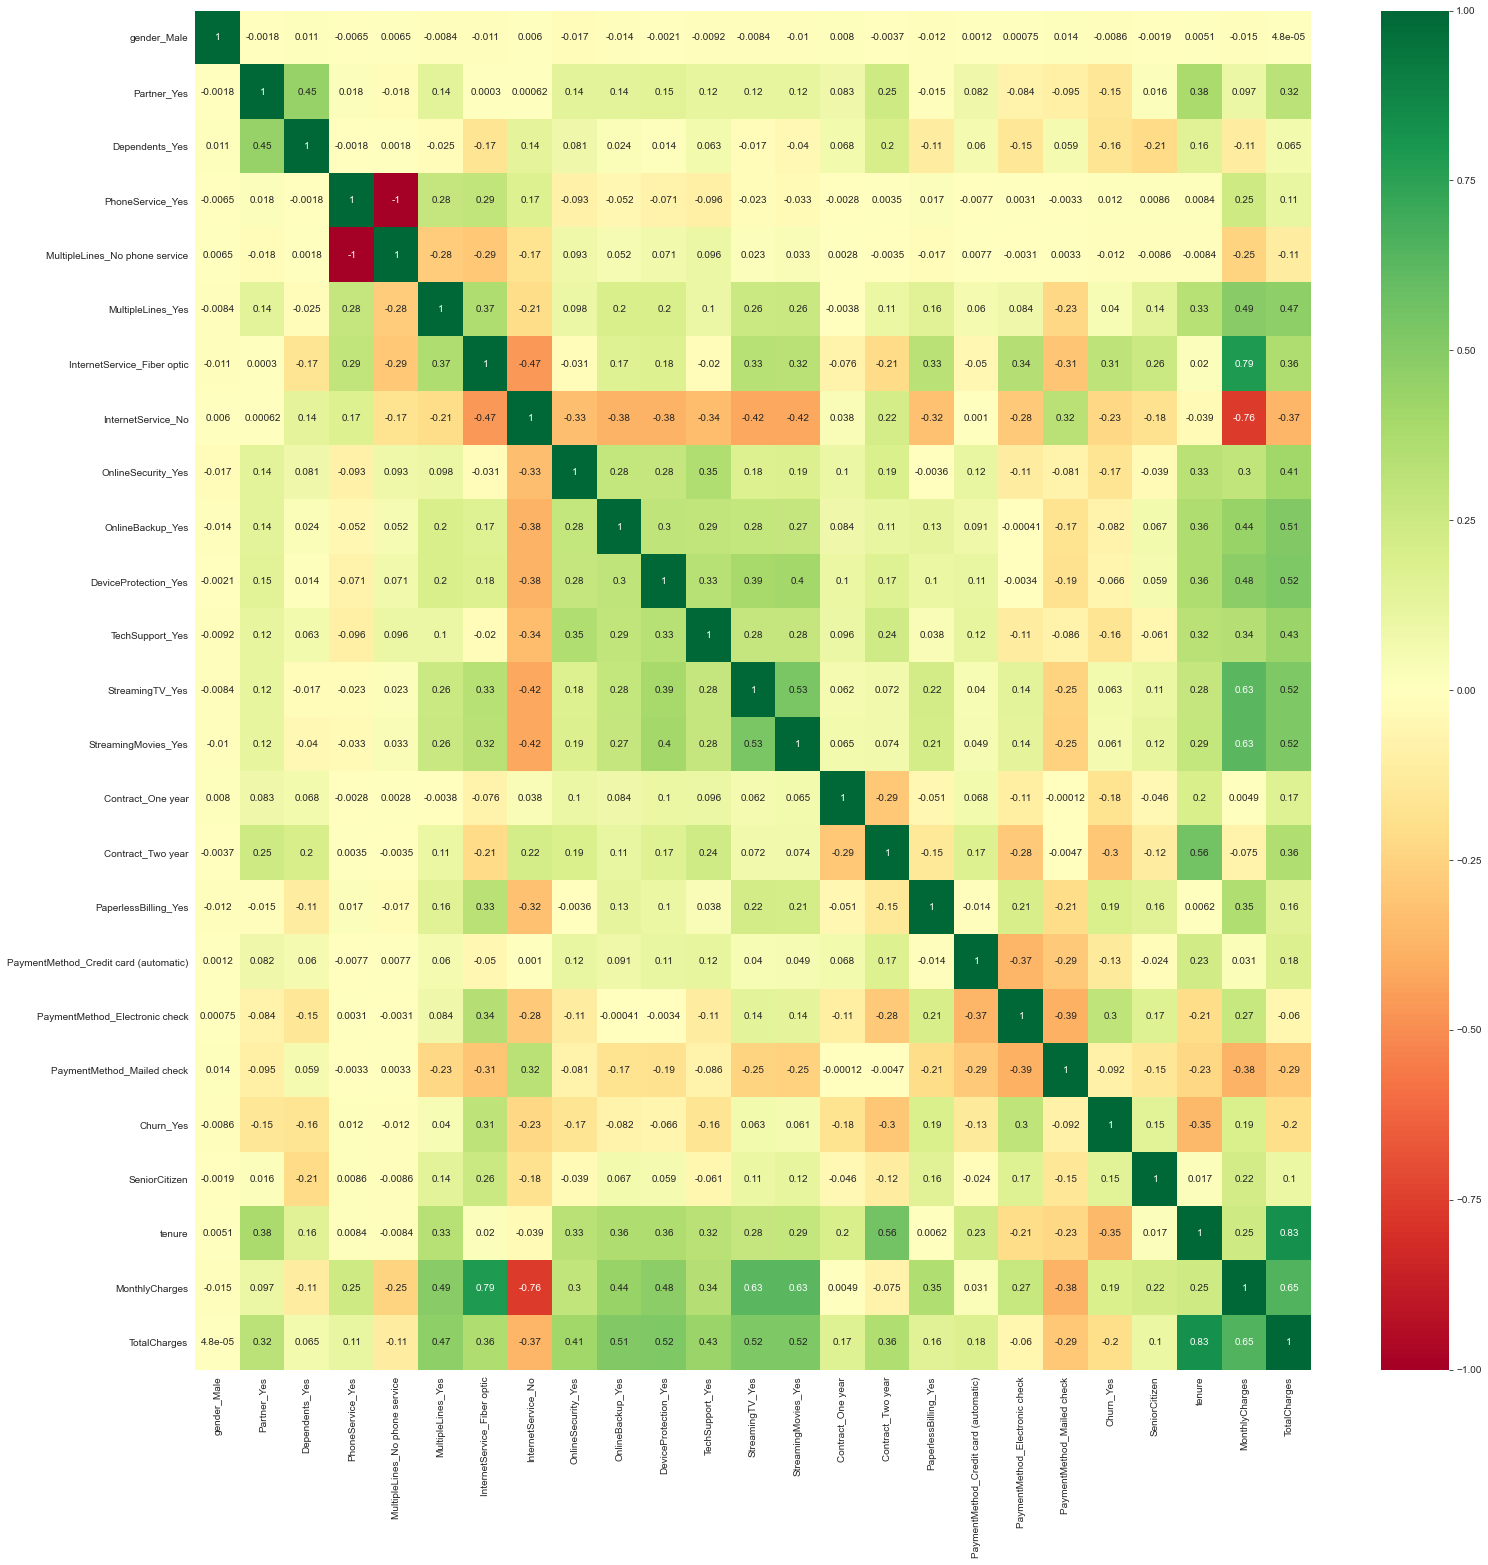

In [94]:
# Heat map for the feature correlations
%matplotlib inline
corr_matrix = train.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(25,25))
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [95]:
y = pd.DataFrame(train, columns=['Churn_Yes'])

In [96]:
y.head()

,Churn_Yes
0,0
1,0
2,1
3,0
4,1


In [97]:
train.drop(labels = 'Churn_Yes', inplace=True, axis=1)

In [98]:
X = train.copy()

In [99]:
X.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,1,29.85,29.85
1,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,34,56.95,1889.50
2,1,0,0,1,0,0,0,0,1,1,...,0,0,1,0,0,1,0,2,53.85,108.15
3,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,2,70.70,151.65


In [100]:
total_cust = 7043
churn_count = 0
for i in y['Churn_Yes']:
    if i == 1:
        churn_count += 1
print('The number of churning customers are: {}'.format(churn_count))
print('Total customers are: ', total_cust)
print('Number of loyal customers are:', (total_cust - churn_count))
print('Churn Rate is: {:.2f} %'.format((churn_count/total_cust)*100))

The number of churning customers are: 1869
Total customers are:  7043
Number of loyal customers are: 5174
Churn Rate is: 26.54 %


In [101]:
# making the split with 80% training data & 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# viewing the shape of the train & test data
print(f"Shape of Training Data: {X_train.shape}, {y_train.shape}")
print(f"Shape of Test Data: {X_test.shape}, {y_test.shape}")

Shape of Training Data: (5634, 24), (5634, 1)
Shape of Test Data: (1409, 24), (1409, 1)


In [102]:
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_dummy_preds = dummy_majority.predict(X_test)
dummy_majority.score(X_test, y_test)

0.7352732434350603

In [103]:
X_train = np.nan_to_num(X_train)

In [104]:
upsample = SMOTE()
X_up_train, y_up_train = upsample.fit_resample(X_train, y_train)

In [105]:
# counting samples per class after Upsampling
print(f"Shape of Training Data (after Upsampling): {X_up_train.shape}, {y_up_train.shape}")
print(f"Shape of Test Data: {X_test.shape}, {y_test.shape}")

Shape of Training Data (after Upsampling): (8276, 24), (8276, 1)
Shape of Test Data: (1409, 24), (1409, 1)


In [106]:
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_up_train, y_up_train)
y_dummy_preds = dummy_majority.predict(X_test)
dummy_majority.score(X_test, y_test)

0.7352732434350603

In [107]:
# Creating dictionary containing all classification models

all_models = {
    "Random_Forest_model":RandomForestClassifier(random_state= 0),
    "KNN_model":KNeighborsClassifier(),
    "Logistic_Regression_model":LogisticRegression(random_state= 0),
    "Gaussian_Naive_Bayes_model":GaussianNB(),
    "SVM_Linear_model":LinearSVC(),
    "SVM_RBF_model":svm.SVC(kernel='rbf'),
    "SVM_Poly_model":svm.SVC(kernel='poly'),
    "XGBoost_model":XGBClassifier()
    }

In [108]:
# initializing a dictionary for recording & summarizing the mean cross validation score for all models

cross_val_summary = {
    "Random_Forest_model":0,
    "KNN_model":0,
    "Logistic_Regression_model":0,
    "Gaussian_Naive_Bayes_model":0,
    "SVM_Linear_model":0,
    "SVM_RBF_model":0,
    "SVM_Poly_model":0,
    "XGBoost_model":0
    }

In [109]:
# initializing a dictionary for storing the trained model pipeline for all models (before hyperparameter tuning)

trained_model = {
    "Random_Forest_model":0,
    "KNN_model":0,
    "Logistic_Regression_model":0,
    "Gaussian_Naive_Bayes_model":0,
    "SVM_Linear_model":0,
    "SVM_RBF_model":0,
    "SVM_Poly_model":0,
    "XGBoost_model":0
    }

In [110]:
# Checking for best baseline model using Cross Validation (before hyperparameter tuning)

for model_name in all_models:
    print(f"Model Name: {model_name}")
    pipe = make_pipeline(StandardScaler(), all_models[model_name]).fit(X_up_train, y_up_train)
    trained_model[model_name] = pipe
    cv_scores = cross_val_score(pipe,X_up_train, y_up_train, cv = 5)
    print('Cross-validation scores (5-fold): \n',cv_scores)
    print('Mean cross-validation score (5-fold): {}'.format(np.mean(cv_scores)))
    cross_val_summary[model_name] = np.mean(cv_scores)
    print()

Model Name: Random_Forest_model


C:\Users\USER\anaconda3\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

Cross-validation scores (5-fold): 
 [0.69142512 0.74018127 0.92628399 0.9305136  0.92749245]
Mean cross-validation score (5-fold): 0.8431792839733203

Model Name: KNN_model


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

Cross-validation scores (5-fold): 
 [0.74637681 0.76193353 0.80725076 0.8163142  0.82477341]
Mean cross-validation score (5-fold): 0.7913297429834931

Model Name: Logistic_Regression_model


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validation scores (5-fold): 
 [0.77958937 0.75649547 0.78429003 0.76435045 0.77643505]
Mean cross-validation score (5-fold): 0.7722320737919056

Model Name: Gaussian_Naive_Bayes_model
Cross-validation scores (5-fold): 
 [0.75301932 0.73534743 0.79697885 0.76495468 0.78247734]
Mean cross-validation score (5-fold): 0.7665555263657196

Model Name: SVM_Linear_model


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validation scores (5-fold): 
 [0.77173913 0.75407855 0.78912387 0.76374622 0.7776435 ]
Mean cross-validation score (5-fold): 0.7712662550899777

Model Name: SVM_RBF_model


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validation scores (5-fold): 
 [0.73671498 0.77401813 0.86706949 0.86465257 0.87311178]
Mean cross-validation score (5-fold): 0.8231133879183268

Model Name: SVM_Poly_model


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validation scores (5-fold): 
 [0.7705314  0.77462236 0.82598187 0.81329305 0.82114804]
Mean cross-validation score (5-fold): 0.8011153436373455

Model Name: XGBoost_model
Cross-validation scores (5-fold): 
 [0.67391304 0.72688822 0.91480363 0.9141994  0.91359517]
Mean cross-validation score (5-fold): 0.8286798896624197



In [111]:
# noting down all mean cross-validation scores together in a dictionary for easy reference
print('The summary of mean Cross Validation Scores is: \n')
print(cross_val_summary)

The summary of mean Cross Validation Scores is: 

{'Random_Forest_model': 0.8431792839733203, 'KNN_model': 0.7913297429834931, 'Logistic_Regression_model': 0.7722320737919056, 'Gaussian_Naive_Bayes_model': 0.7665555263657196, 'SVM_Linear_model': 0.7712662550899777, 'SVM_RBF_model': 0.8231133879183268, 'SVM_Poly_model': 0.8011153436373455, 'XGBoost_model': 0.8286798896624197}


<BarContainer object of 8 artists>

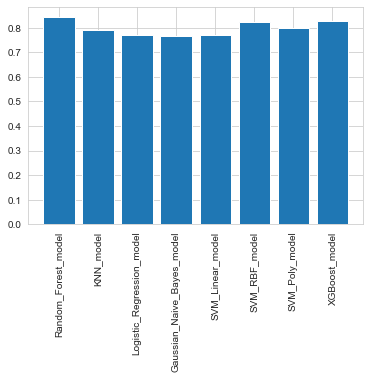

In [112]:
# plotting the mean cross validation scores for all the models for better visualization
plt.xticks(rotation=90)
plt.bar(cross_val_summary.keys(), cross_val_summary.values())

In [113]:
# initializing a dictionary for recording & summarizing the test set accuracy score for all models before hyperparameter tuning

test_score_before_tuning = {
    "Random_Forest_model":0,
    "KNN_model":0,
    "Logistic_Regression_model":0,
    "Gaussian_Naive_Bayes_model":0,
    "SVM_Linear_model":0,
    "SVM_RBF_model":0,
    "SVM_Poly_model":0,
    "XGBoost_model":0
    }

Model Name: Random_Forest_model
Accuracy: 0.7984386089425124
F1 Score: 0.7184537881346393
Precision: 0.7453299619154649
Recall: 0.703372943989566


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


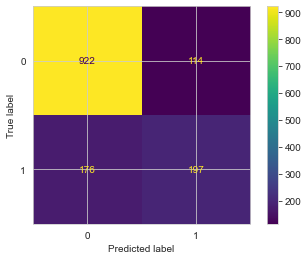


Model Name: KNN_model
Accuracy: 0.7132718239886444
F1 Score: 0.6792313760847516
Precision: 0.676472303692841
Recall: 0.7192335959091991


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


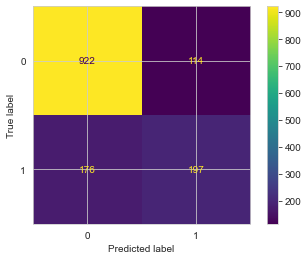


Model Name: Logistic_Regression_model
Accuracy: 0.7544357700496807
F1 Score: 0.7269551132697685
Precision: 0.7218259555261088
Recall: 0.7772508720900142


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


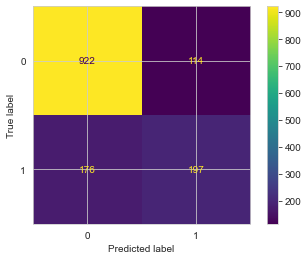


Model Name: Gaussian_Naive_Bayes_model
Accuracy: 0.7565649396735273
F1 Score: 0.7278049154133697
Precision: 0.7214595330593482
Recall: 0.7752673201734863


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


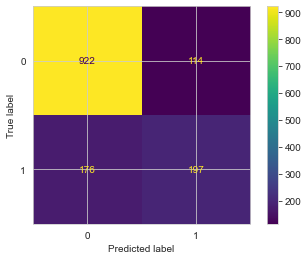


Model Name: SVM_Linear_model
Accuracy: 0.7487579843860894
F1 Score: 0.7217465524166554
Precision: 0.7179318183693508
Recall: 0.7733898682290103


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


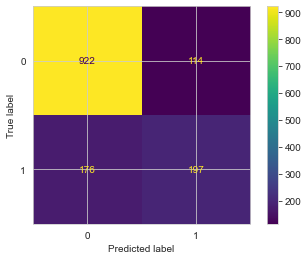


Model Name: SVM_RBF_model
Accuracy: 0.7984386089425124
F1 Score: 0.7478728766570896
Precision: 0.7421892676208746
Recall: 0.7548443694556295


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


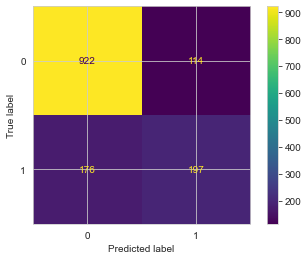


Model Name: SVM_Poly_model
Accuracy: 0.7437899219304471
F1 Score: 0.7107820811335612
Precision: 0.7041203937405351
Recall: 0.7511386338464086


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


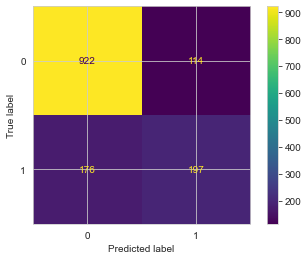


Model Name: XGBoost_model
Accuracy: 0.794180269694819
F1 Score: 0.7200641795053082
Precision: 0.7365745377447449
Recall: 0.7090557620048237


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


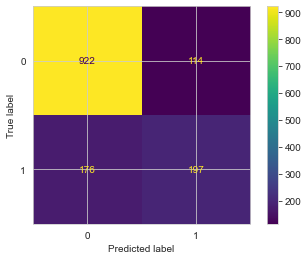

In [114]:
# all models (except for voting classifier) are implemented before hyperparameter tuning to check the performance
# the corresponding test scores are saved in the dictionary 'test_score_before_tuning' as noted above
X_test = np.nan_to_num(X_test)
for model_name in all_models:
    print(f"Model Name: {model_name}")
    predictions = trained_model[model_name].predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy}")
    test_score_before_tuning[model_name] = accuracy
    print(f"F1 Score: {f1_score(y_test, predictions, average='macro')}")
    print(f"Precision: {precision_score(y_test, predictions,average='macro')}")
    print(f"Recall: {recall_score(y_test, predictions,average='macro')}")
    plot_confusion_matrix(pipe, X_test, y_test)
    plt.show()
    print()

In [115]:
print('The summary of Accuracy Scores on Test Set (before hyperparameter tuning) is: \n')
print(test_score_before_tuning)

The summary of Accuracy Scores on Test Set (before hyperparameter tuning) is: 

{'Random_Forest_model': 0.7984386089425124, 'KNN_model': 0.7132718239886444, 'Logistic_Regression_model': 0.7544357700496807, 'Gaussian_Naive_Bayes_model': 0.7565649396735273, 'SVM_Linear_model': 0.7487579843860894, 'SVM_RBF_model': 0.7984386089425124, 'SVM_Poly_model': 0.7437899219304471, 'XGBoost_model': 0.794180269694819}


<BarContainer object of 8 artists>

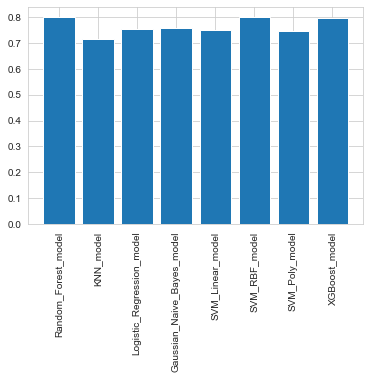

In [116]:
plt.xticks(rotation=90)
scores_before_tuning = plt.bar(test_score_before_tuning.keys(), test_score_before_tuning.values())
scores_before_tuning 

### Hyperparameter tuning

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

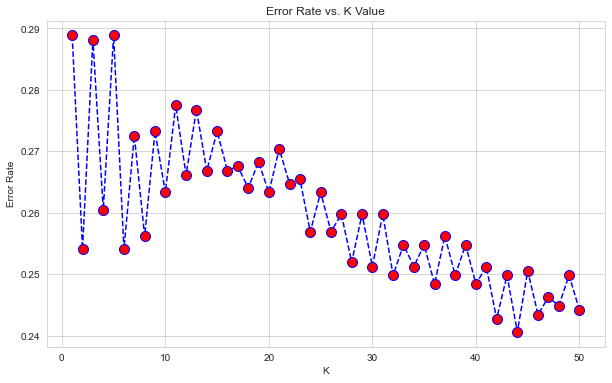

In [117]:
# KNN classifier
error_rate = []
for i in range(1, 51):
    pipeline = KNeighborsClassifier(n_neighbors = i)
    pipeline.fit(X_up_train, y_up_train)
    predictions = pipeline.predict(X_test).reshape(1409,1)
    accuracy = accuracy_score(y_test, predictions)
    #print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,51),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [120]:
# we create a dictionary of dictionaries, where the keys correspond to the model name and the values are corresponding dictionaries specifying the hyperparameters to be tuned and the values which will be checked for that model (parameter search space).

param_grids = {
    "Random_Forest_model":{'n_estimators': [100, 200],
                           'max_depth': [3,5],
                           'random_state': [10]},
    "KNN_model":{'n_neighbors' : [2,3,5],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']},
    "Logistic_Regression_model":{'random_state': [10]},
    "Gaussian_Naive_Bayes_model":{'var_smoothing': np.logspace(0,-9, num=10)},
    "SVM_Linear_model":{'max_iter': [100,1000,10000]},
    "SVM_RBF_model":{'C': [10, 100, 1000], 
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['rbf']},
    "SVM_Poly_model":{'C': [10, 100, 1000], 
              'degree': [2, 3, 4],
              'kernel': ['poly']},
    "XGBoost_model":{'max_depth': [3, 5, 7], 
                     'min_child_weight': [5,6,7]}
    }

In [121]:
# we create a dictionary of dictionaries, where the keys correspond to the model name and the values are corresponding dictionaries specifying the hyperparameters to be tuned and the values which will be checked for that model (parameter search space).

param_grids = {
    "Random_Forest_model":{'n_estimators': [100, 200],
                           'max_depth': [3,5],
                           'random_state': [10]},
    "KNN_model":{'n_neighbors' : [6,7,8],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']},
    "Logistic_Regression_model":{'random_state': [10]},
    "Gaussian_Naive_Bayes_model":{'var_smoothing': np.logspace(0,-9, num=10)},
    "SVM_Linear_model":{'max_iter': [100,1000,10000]},
    "SVM_RBF_model":{'C': [10, 100, 1000], 
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['rbf']},
    "SVM_Poly_model":{'C': [10, 100, 1000], 
              'degree': [2, 3, 4],
              'kernel': ['poly']},
    "XGBoost_model":{'max_depth': [3, 5, 7], 
                     'min_child_weight': [5,6,7]}
    }

In [122]:
# We create a dictionary for storing the models with the best parameters

tuned_model = {
    "Random_Forest_model":0,
    "KNN_model":0,
    "Logistic_Regression_model":0,
    "Gaussian_Naive_Bayes_model":0,
    "SVM_Linear_model":0,
    "SVM_RBF_model":0,
    "SVM_Poly_model":0,
    "XGBoost_model":0
    }

In [123]:
for model_name in all_models:
    print(f"Model Name: {model_name}")
    grid = GridSearchCV(all_models[model_name], param_grids[model_name], scoring='accuracy', n_jobs = -1, refit = True, verbose = 0).fit(X_up_train, y_up_train)
    print("Best Params:",grid.best_params_)
    print("Best Estimator", grid.best_estimator_)
    tuned_model[model_name]= grid.best_estimator_
    print('----------------------------------------------------------------------------')
    print()

Model Name: Random_Forest_model


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Params: {'max_depth': 5, 'n_estimators': 200, 'random_state': 10}
Best Estimator RandomForestClassifier(max_depth=5, n_estimators=200, random_state=10)
----------------------------------------------------------------------------

Model Name: KNN_model


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Best Params: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Best Estimator KNeighborsClassifier(metric='manhattan', n_neighbors=6, weights='distance')
----------------------------------------------------------------------------

Model Name: Logistic_Regression_model


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Params: {'random_state': 10}
Best Estimator LogisticRegression(random_state=10)
----------------------------------------------------------------------------

Model Name: Gaussian_Naive_Bayes_model


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Params: {'var_smoothing': 1e-09}
Best Estimator GaussianNB()
----------------------------------------------------------------------------

Model Name: SVM_Linear_model


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Params: {'max_iter': 10000}
Best Estimator LinearSVC(max_iter=10000)
----------------------------------------------------------------------------

Model Name: SVM_RBF_model


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Params: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Best Estimator SVC(C=1000, gamma=0.001)
----------------------------------------------------------------------------

Model Name: SVM_Poly_model


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Params: {'C': 1000, 'degree': 2, 'kernel': 'poly'}
Best Estimator SVC(C=1000, degree=2, kernel='poly')
----------------------------------------------------------------------------

Model Name: XGBoost_model
Best Params: {'max_depth': 3, 'min_child_weight': 6}
Best Estimator XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=6,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
---------------------

In [124]:
print(tuned_model)

{'Random_Forest_model': RandomForestClassifier(max_depth=5, n_estimators=200, random_state=10), 'KNN_model': KNeighborsClassifier(metric='manhattan', n_neighbors=6, weights='distance'), 'Logistic_Regression_model': LogisticRegression(random_state=10), 'Gaussian_Naive_Bayes_model': GaussianNB(), 'SVM_Linear_model': LinearSVC(max_iter=10000), 'SVM_RBF_model': SVC(C=1000, gamma=0.001), 'SVM_Poly_model': SVC(C=1000, degree=2, kernel='poly'), 'XGBoost_model': XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=6,
              missing=nan, monotone_con

### Performance testing on tuned model

In [125]:
# initializing a dictionary for recording & summarizing the test accuracy score for all models after hyperparameter tuning

test_score_after_tuning = {
    "Random_Forest_model":0,
    "KNN_model":0,
    "Logistic_Regression_model":0,
    "Gaussian_Naive_Bayes_model":0,
    "SVM_Linear_model":0,
    "SVM_RBF_model":0,
    "SVM_Poly_model":0,
    "XGBoost_model":0
    }

Model Name: Random_Forest_model


C:\Users\USER\anaconda3\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Accuracy: 0.7970191625266146
F1 Score: 0.7577978497312163
Precision: 0.7458433516309032
Recall: 0.7804726883145114


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


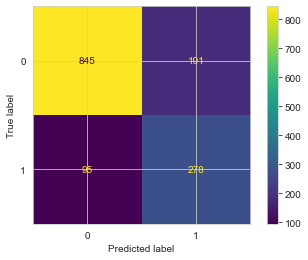

--------------------------------------------------------------------------------------

Model Name: KNN_model


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.7622427253371186
F1 Score: 0.6974606086360715
Precision: 0.6957151930894309
Recall: 0.6993476145620918


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


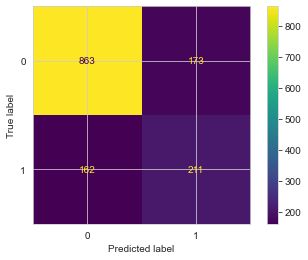

--------------------------------------------------------------------------------------

Model Name: Logistic_Regression_model
Accuracy: 0.7544357700496807
F1 Score: 0.7269551132697685
Precision: 0.7218259555261088
Recall: 0.7772508720900142


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


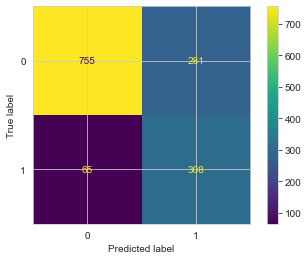

--------------------------------------------------------------------------------------

Model Name: Gaussian_Naive_Bayes_model
Accuracy: 0.7565649396735273
F1 Score: 0.7278049154133697
Precision: 0.7214595330593482
Recall: 0.7752673201734863


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


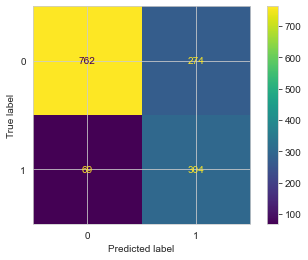

--------------------------------------------------------------------------------------

Model Name: SVM_Linear_model


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7487579843860894
F1 Score: 0.7217465524166554
Precision: 0.7179318183693508
Recall: 0.7733898682290103


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


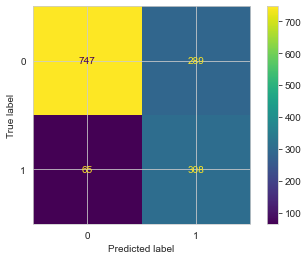

--------------------------------------------------------------------------------------

Model Name: SVM_RBF_model


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8019872249822569
F1 Score: 0.750106953265396
Precision: 0.7460978720212048
Recall: 0.7546839255954537


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


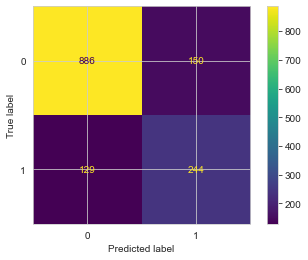

--------------------------------------------------------------------------------------

Model Name: SVM_Poly_model


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8090844570617459
F1 Score: 0.754157842676223
Precision: 0.7548227245532346
Recall: 0.7535051807840012


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


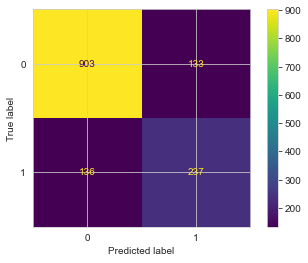

--------------------------------------------------------------------------------------

Model Name: XGBoost_model
Accuracy: 0.8062455642299503
F1 Score: 0.7432328244809846
Precision: 0.7520690722048188
Recall: 0.7361332512136801


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


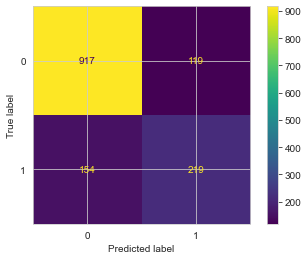

--------------------------------------------------------------------------------------



In [126]:
for model_name in tuned_model:
    print(f"Model Name: {model_name}")
    pipe = make_pipeline(StandardScaler(), tuned_model[model_name]).fit(X_up_train, y_up_train)
    predictions = pipe.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    test_score_after_tuning[model_name] = accuracy
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1_score(y_test, predictions, average='macro')}")
    print(f"Precision: {precision_score(y_test, predictions,average='macro')}")
    print(f"Recall: {recall_score(y_test, predictions,average='macro')}")
    plot_confusion_matrix(pipe, X_test, y_test)
    plt.show()
    print('--------------------------------------------------------------------------------------')
    print()

In [127]:
print('The summary of Accuracy Scores on Test Set (after hyperparameter tuning) is: \n')
print(test_score_after_tuning)

The summary of Accuracy Scores on Test Set (after hyperparameter tuning) is: 

{'Random_Forest_model': 0.7970191625266146, 'KNN_model': 0.7622427253371186, 'Logistic_Regression_model': 0.7544357700496807, 'Gaussian_Naive_Bayes_model': 0.7565649396735273, 'SVM_Linear_model': 0.7487579843860894, 'SVM_RBF_model': 0.8019872249822569, 'SVM_Poly_model': 0.8090844570617459, 'XGBoost_model': 0.8062455642299503}


<BarContainer object of 8 artists>

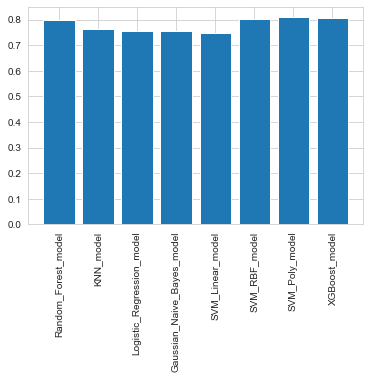

In [128]:
plt.xticks(rotation=90)
plt.bar(test_score_after_tuning.keys(), test_score_after_tuning.values())

We sought to develop a comprehensive view of the customer and develop advanced algorithms that help predict customer churn. 8 ML algorithms built, ran, tested. For decision, we focused on Recall and Accuracy to focus on the correct predictions relative to all customers who actually churn. Random Forest was the best model based on both performance metrics with accuracy 0.81, recall of 0.78 (7.3% above benchmark).To improve performance, multiple tuning/ improvement tools have been applied throughout the process. We also identifed the main drivers (specially tenure, custumers with fiber optic, customer paying electronically..) for the churn rate and we suggest the Telco to automate the capture of those metrics through a dashboard to get a full picture of customer behavior and track deviations in order to act proactively. In addition, We recommend a customer segmentation into 4 groups and adapt a marketing strategy for each of the groups identified. The segmentation would account for the value of the customers to the company in terms of monthly revenue with the threshold being the overall monthly charge average ($ 64). A customer whose contract is below the threshold would be categorised as "low value" and the one above would be classified as "high value". Then according to the churn model, those customers identified as soon-to-be-leaving the services would be treated as high risk customers. A first focus would be on those customers identified as "high value" and "high risk" and offer them a voucher and customized bundle centered around TV Package, Streaming service and cloud service to avoid churn. For the long term sucess, It would also be advisable to continue collecting the data (billing, marketing data, demographics..) and improving the churn algorithm to allow effective segmentation, better offer personalization and increased ROI to the company.